In [1]:
#Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [2]:
#API Keys for twitter
Consumer_APIkey = "mCTjowaxt1qrTtxssIiu6Y7h9"
Consumer_APIsecret = "lctzQUzk2rApzaX7XvvP0kLIU5c9XK93BrNOfNXAW9o8SUu2Rf"
Access_Token = "772933790498861056-uxgL5y35imSXyAMTrB412k9fYgu4UHS"
Access_Tokensecret = "X1HTHMejcJGgi0LpoxjwBkzyX5UnuSbadyggl0YkVyS86"

#Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(Consumer_APIkey, Consumer_APIsecret)
auth.set_access_token(Access_Token, Access_Tokensecret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#Target Search Term
target_terms = ['@BBC','@CBS','@CNN','@FoxNews','@nytimes']

In [4]:
    # Variables for holding sentiments and for dataframe
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = [] 
    
    news_organizations = []
    text = []
    date = []
    tweets_ago = []

In [5]:
# looping through users
for user in target_terms:
    
    # tweets count
    tweet_count = 0

    # Get the last 100 tweets (5*20)
    for x in range(5):
        
        public_tweets = api.user_timeline(user, page=x)

        # Loop through tweets
        for tweet in public_tweets:
        
            # Incrementing tweet_count
            tweet_count += 1
    
            # Add values to list
            news_organizations.append(user)
            text.append(tweet['text'])
            date.append(tweet['created_at'])
            tweets_ago.append(tweet_count)
    
            # Run Analysis on tweets
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            
            # Add values to the list
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)

In [6]:
# to create DataFrame
TweetData = pd.DataFrame({"News Organization": news_organizations,
                          "Tweet Content": text,
                          "Date & Time (UTC)": date,
                          "Compound Score": compound_list,
                          "Positive Score": positive_list,
                          "Neutral Score": neutral_list,
                          "Negative Score": negative_list,
                          "Tweets Ago": tweets_ago})

In [7]:
TweetData.head()

,Compound Score,Date & Time (UTC),Negative Score,Neutral Score,News Organization,Positive Score,Tweet Content,Tweets Ago
0,-0.6705,Wed Jan 03 17:57:04 +0000 2018,0.282,0.718,@BBC,0.000,"Tonight, @ChefTomKerridge recruits and mentors...",1
1,-0.2942,Wed Jan 03 17:30:09 +0000 2018,0.103,0.897,@BBC,0.000,Mr Fish Finger deserves to be remembered!\n\nH...,2
2,0.6486,Wed Jan 03 17:02:01 +0000 2018,0.000,0.791,@BBC,0.209,"New year, new start. 🙌 \n\n@BBCR1 DJ @AdeleRob...",3
3,0.0516,Wed Jan 03 15:46:04 +0000 2018,0.000,0.938,@BBC,0.062,JMW Turner's delicate watercolour paintings ca...,4
4,0.0000,Wed Jan 03 14:57:03 +0000 2018,0.000,1.000,@BBC,0.000,The UK's first polar bear cub in 25 years has ...,5


In [8]:
TweetData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
Compound Score       499 non-null float64
Date & Time (UTC)    499 non-null object
Negative Score       499 non-null float64
Neutral Score        499 non-null float64
News Organization    499 non-null object
Positive Score       499 non-null float64
Tweet Content        499 non-null object
Tweets Ago           499 non-null int64
dtypes: float64(4), int64(1), object(3)
memory usage: 31.3+ KB


In [9]:
# info based on News Organizations 
bbc = TweetData.loc[TweetData["News Organization"] == "@BBC"]
cbs = TweetData.loc[TweetData["News Organization"] == "@CBS"]
cnn = TweetData.loc[TweetData["News Organization"] == "@CNN"]
fox = TweetData.loc[TweetData["News Organization"] == "@FoxNews"]
nyt = TweetData.loc[TweetData["News Organization"] == "@nytimes"]

In [10]:
# Scatter plots
plt.scatter(bbc['Tweets Ago'], bbc['Compound Score'], c='b', s=50, alpha=0.95, label='BBC')
plt.scatter(cbs['Tweets Ago'], cbs['Compound Score'], c='r', s=50, alpha=0.95, label='CBS')
plt.scatter(cnn['Tweets Ago'], cnn['Compound Score'], c='g', s=50, alpha=0.95, label='CNN')
plt.scatter(fox['Tweets Ago'], fox['Compound Score'], c='m', s=50, alpha=0.95, label='Fox')
plt.scatter(nyt['Tweets Ago'], nyt['Compound Score'], c='k', s=50, alpha=0.95, label='New York Times')

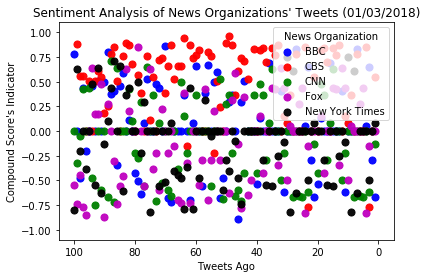

In [11]:
# Plot title and lables
plt.title("Sentiment Analysis of News Organizations' Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Compound Score's Indicator")
plt.ylim(-1.1,1.1)
plt.legend(title='News Organization', fontsize='medium')

plt.show()

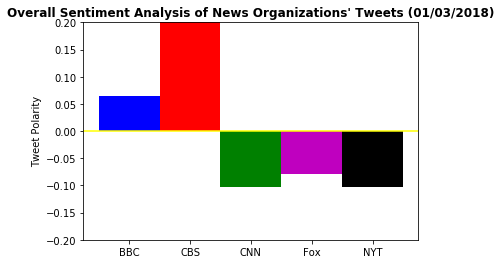

In [14]:
# bar chart
plt.bar(0, bbc['Compound Score'].mean(), color='b', width=1)
plt.bar(1, cbs['Compound Score'].mean(), color='r', width=1)
plt.bar(2, cnn['Compound Score'].mean(), color='g', width=1)
plt.bar(3, fox['Compound Score'].mean(), color='m', width=1)
plt.bar(4, nyt['Compound Score'].mean(), color='k', width=1)

plt.title("Overall Sentiment Analysis of News Organizations' Tweets (%s)" % (time.strftime("%m/%d/%Y")),
                                                                           fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylim(-0.2, 0.2)
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, color = 'yellow') 
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

plt.show()